In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.tree import DecisionTreeRegressor

from xgboost import XGBRegressor
from catboost import CatBoostRegressor

from sklearn.feature_selection import SelectFromModel, RFECV, RFE
from sklearn.feature_selection import GenericUnivariateSelect, mutual_info_regression, f_regression

We will be using **Superconductivty Data Data Set**. The goal here is to predict the critical temperature based on the features extracted. Data can be downloaded through this [link](https://archive.ics.uci.edu/ml/datasets/Superconductivty+Data)

In [2]:
df = pd.read_csv('train.csv')
df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [3]:
df.isna().sum().sum()

0

Data has no missing values throughout all the columns

In [4]:
df.describe()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
count,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,...,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000,21263.000000
mean,4.115224,87.557631,72.988310,71.290627,58.539916,1.165608,1.063884,115.601251,33.225218,44.391893,...,3.153127,3.056536,3.055885,1.295682,1.052841,2.041010,1.483007,0.839342,0.673987,34.421219
std,1.439295,29.676497,33.490406,31.030272,36.651067,0.364930,0.401423,54.626887,26.967752,20.035430,...,1.191249,1.046257,1.174815,0.393155,0.380291,1.242345,0.978176,0.484676,0.455580,34.254362
min,1.000000,6.941000,6.423452,5.320573,1.960849,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000210
25%,3.000000,72.458076,52.143839,58.041225,35.248990,0.966676,0.775363,78.512902,16.824174,32.890369,...,2.116732,2.279705,2.091251,1.060857,0.775678,1.000000,0.921454,0.451754,0.306892,5.365000
50%,4.000000,84.922750,60.696571,66.361592,39.918385,1.199541,1.146783,122.906070,26.636008,45.123500,...,2.618182,2.615321,2.434057,1.368922,1.166532,2.000000,1.063077,0.800000,0.500000,20.000000
75%,5.000000,100.404410,86.103540,78.116681,73.113234,1.444537,1.359418,154.119320,38.356908,59.322812,...,4.026201,3.727919,3.914868,1.589027,1.330801,3.000000,1.918400,1.200000,1.020436,63.000000
max,9.000000,208.980400,208.980400,208.980400,208.980400,1.983797,1.958203,207.972460,205.589910,101.019700,...,7.000000,7.000000,7.000000,2.141963,1.949739,6.000000,6.992200,3.000000,3.000000,185.000000


In [5]:
df.shape

(21263, 82)

So the data has 81 features. Our goal is to reduce the number of 

In [6]:
# Organizing Train data
X = df[df.columns[:-1]]
y = df[df.columns[-1:]]

Dictionary of Regressors used in this tutorial

In [8]:
d = {'Linear Regression': LinearRegression(),
    'Lasso Regression': LassoCV(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'ExtraTreesRegressor':ExtraTreesRegressor(),
    'XGBRegressor':XGBRegressor(verbose=0,objective='reg:squarederror')
    }

Use Below Regressors if you need more precise results, but we are avoiding the use of these regressors as the time taken to run these regressors is very high
- 'CatBoostRegressor':CatBoostRegressor(verbose=0)

#  DImentionality Reduction using various techniques

## 1. Univariate feature selection

**Univariate feature selection** works by selecting the best features based on univariate statistical tests.

***GenericUnivariateSelect*** allows to perform univariate feature selection with a configurable strategy. This allows to select the best univariate selection strategy with hyper-parameter search estimator.

This function take as input a scoring function that returns univariate scores and p-values.
- **modes** : 
        ‘percentile’ - removes all but a user-specified highest scoring percentage of features
        ‘k_best’ - removes all but the 'k' highest scoring features
        ‘fpr’ -  false positive rate
        ‘fdr’ - false discovery rate
        ‘fwe’ - family wise error 
    
- **score_fun** : 
        For regression: f_regression, mutual_info_regression
        For classification: chi2, f_classif, mutual_info_classif

In [7]:
n_best_parameters = 20

In [10]:
trans = GenericUnivariateSelect(score_func=mutual_info_regression, mode='k_best', param=n_best_parameters)
trans.fit(X, y)
columns_retained_GUV = df.iloc[:, :-1].columns[trans.get_support()].values
columns_retained_GUV
X_trans = trans.transform(X)
pd.DataFrame(X_trans, columns=columns_retained_GUV).head()

,entropy_atomic_mass,entropy_fie,range_fie,std_fie,entropy_atomic_radius,std_atomic_radius,gmean_Density,entropy_Density,range_Density,gmean_ElectronAffinity,entropy_ElectronAffinity,range_ElectronAffinity,std_ElectronAffinity,gmean_FusionHeat,entropy_FusionHeat,mean_ThermalConductivity,gmean_ThermalConductivity,std_ThermalConductivity,wtd_mean_Valence,wtd_gmean_Valence
0,1.181795,1.305967,810.6,323.811808,1.259244,75.237540,724.953211,1.033129,8958.571,60.123179,1.159687,127.05,51.433712,3.479475,1.088575,107.756645,7.062488,168.854244,2.257143,2.219783
1,1.449309,1.544145,810.6,290.183029,1.508328,67.321319,1237.095080,1.314442,10488.571,69.833315,1.427997,127.05,49.438167,4.403790,1.374977,172.205316,16.064228,198.554600,2.257143,2.210679
2,1.181795,1.305967,810.6,323.811808,1.259244,75.237540,724.953211,1.033129,8958.571,60.123179,1.159687,127.05,51.433712,3.479475,1.088575,107.756645,7.062488,168.854244,2.271429,2.232679
3,1.181795,1.305967,810.6,323.811808,1.259244,75.237540,724.953211,1.033129,8958.571,60.123179,1.159687,127.05,51.433712,3.479475,1.088575,107.756645,7.062488,168.854244,2.264286,2.226222
4,1.181795,1.305967,810.6,323.811808,1.259244,75.237540,724.953211,1.033129,8958.571,60.123179,1.159687,127.05,51.433712,3.479475,1.088575,107.756645,7.062488,168.854244,2.242857,2.206963


## 2. Backward Elimination using Statistical Significance

- This method used p-values for elemination of the feature.
- Significance level can be set using p_threshold.
- We have used OLS(Ordinary Least Squares) regression (commonly known as Linear Regression) for finding p-values

In [9]:
# Using P-value for for elemination
p_threshold = 0.05
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>p_threshold):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print('number of features selected: ',len(selected_features_BE)
#print(selected_features_BE)

number of features selected:  69 
 ['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass', 'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass', 'range_atomic_mass', 'std_atomic_mass', 'mean_fie', 'wtd_mean_fie', 'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie', 'range_fie', 'wtd_range_fie', 'std_fie', 'mean_atomic_radius', 'wtd_mean_atomic_radius', 'wtd_gmean_atomic_radius', 'entropy_atomic_radius', 'wtd_entropy_atomic_radius', 'range_atomic_radius', 'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius', 'mean_Density', 'gmean_Density', 'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density', 'range_Density', 'std_Density', 'wtd_std_Density', 'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity', 'gmean_ElectronAffinity', 'wtd_gmean_ElectronAffinity', 'wtd_entropy_ElectronAffinity', 'range_ElectronAffinity', 'wtd_range_ElectronAffinity', 'std_ElectronAffinity', 'wtd_std_ElectronAffinity', 'mean_FusionHeat', 'wtd_mean_Fusio

### 3. Model-based  (Select-from-Model)

SelectFromModel is a meta-transformer that can be used along with any estimator that has a coef_ or feature_importances_ attribute after fitting. The features are considered unimportant and removed, if the corresponding coef_ or feature_importances_ values are below the provided threshold parameter. Apart from specifying the threshold numerically, there are built-in heuristics for finding a threshold using a string argument. Available heuristics are “mean”, “median” and float multiples of these like “0.1*mean”

##### Using 'median' as threshold to remove the features

In [11]:
importance_df = pd.DataFrame(columns=[k for k in d.keys()],index=df.columns[:-1])

In [13]:
for clf_name,classifier in d.items():
    trans = SelectFromModel(classifier, threshold='median')
    X_trans = trans.fit_transform(X, y)
    classifier.fit(X, y)
    try:
        #print(classifier.feature_importances_)
        importance_df[clf_name] = classifier.feature_importances_
    except:
        if len(classifier.coef_) == 1:
            #print(classifier.coef_[0])
            importance_df[clf_name] = classifier.coef_[0]
        else:
            #print(classifier.coef_)
            importance_df[clf_name] = classifier.coef_
    
    columns_retained = df.iloc[:,:-1].columns[trans.get_support()].values
    #print('Columns Selected by ',clf_name,' are: [',','.join(columns_retained),']')
    print('No of columns retained by',clf_name,': ',len(columns_retained))
    print()

No of columns retained by Linear Regression :  41

No of columns retained by Lasso Regression :  81

No of columns retained by Decision Tree Regression :  41

No of columns retained by ExtraTreesRegressor :  41

No of columns retained by XGBRegressor :  41



##### Using 'mean' as threshold to remove the features

In [14]:
for clf_name,classifier in d.items():
    trans = SelectFromModel(classifier, threshold='mean')
    X_trans = trans.fit_transform(X, y)
    classifier.fit(X, y)
    try:
        #print(classifier.feature_importances_)
        importance_df[clf_name] = classifier.feature_importances_
    except:
        if len(classifier.coef_) == 1:
            #print(classifier.coef_[0])
            importance_df[clf_name] = classifier.coef_[0]
        else:
            #print(classifier.coef_)
            importance_df[clf_name] = classifier.coef_
    
    columns_retained = df.iloc[:,:-1].columns[trans.get_support()].values
    #print('Columns Selected by ',clf_name,' are: [',','.join(columns_retained),']')
    print('No of columns retained by',clf_name,': ',len(columns_retained))
    print()

No of columns retained by Linear Regression :  18

No of columns retained by Lasso Regression :  7

No of columns retained by Decision Tree Regression :  12

No of columns retained by ExtraTreesRegressor :  15

No of columns retained by XGBRegressor :  13



**importance_df** contains the feature importance of all the features calculated using the 5 classifiers

In [15]:
importance_df.head()

,Linear Regression,Lasso Regression,Decision Tree Regression,ExtraTreesRegressor,XGBRegressor
number_of_elements,-3.496454,0.0,0.000040,0.003951,0.000714
mean_atomic_mass,0.848042,0.0,0.000986,0.002630,0.001313
wtd_mean_atomic_mass,-0.904070,0.0,0.005938,0.004593,0.004355
gmean_atomic_mass,-0.510199,0.0,0.001036,0.002278,0.001347
wtd_gmean_atomic_mass,0.646808,0.0,0.002378,0.003661,0.000476


## 4. RFE (Recursive feature elimination)

Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_immportances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

Below code outputs the optimal number of features, which when used by the classifier gives the best score.

In [ ]:
for clf_name, classifier in d.items():
    high_score=0
    nof=0           
    score_list =[]
    for n in range(1,len(X.columns)+1):
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
        model = classifier
        rfe = RFE(model,n)
        X_train_rfe = rfe.fit_transform(X_train,y_train)
        X_test_rfe = rfe.transform(X_test)
        model.fit(X_train_rfe,y_train)
        score = model.score(X_test_rfe,y_test)
        score_list.append(score)
        if(score>high_score):
            high_score = score
            nof = n
    print("Optimum number of features by ",clf_name,' : %d' %nof)
    print("Score of",clf_name," with %d features: %f" % (nof, high_score))

Optimum number of features by  Linear Regression  : 80
Score of Linear Regression  with 80 features: 0.738674
Optimum number of features by  Lasso Regression  : 8
Score of Lasso Regression  with 8 features: 0.607689
Optimum number of features by  Decision Tree Regression  : 81
Score of Decision Tree Regression  with 81 features: 0.878737
Optimum number of features by  ExtraTreesRegressor  : 69
Score of ExtraTreesRegressor  with 69 features: 0.918793


WE can use the **RFE** to find the `n` most important features

*change the the `n_features_to_select` to the optimal number of features*


## RFE-CV (Recursive feature elimination with Cross Validation)

RFECV is silimar to RFE but performs RFE in a cross-validation loop to find the optimal number of features.

In [33]:
for clf_name, classifier in d.items():
    trans = RFECV(classifier)
    X_trans = trans.fit_transform(X, y)
    columns_retained_RFECV = df.iloc[:, :-1].columns[trans.get_support()].values
    #print('Columns Selected by ',clf_name,' are: [',','.join(columns_retained_RFECV),']')
    print("Optimum number of features by ",clf_name,' :', len(columns_retained_RFECV))
    print()

Optimum number of features by  Linear Regression  : 77

Optimum number of features by  Lasso Regression  : 6

Optimum number of features by  Decision Tree Regression  : 24

Optimum number of features by  ExtraTreesRegressor  : 70

Optimum number of features by  XGBRegressor  : 58



## 5. Using feature_selector

Feature selector is a tool for dimensionality reduction of machine learning datasets.
Clone the repository through this [link](https://github.com/WillKoehrsen/feature-selector)

Technique available to identify features to remove:
- Missing Values
- Single Unique Values
- Collinear Features
- Zero Importance Features
- Low Importance Features

Create the feature_selector object for performing various types of feature selection techniques and plotting graphs

In [91]:
from feature_selector import FeatureSelector
fs = FeatureSelector(data = X,labels=y)

##### Finding Missing Values

In [92]:
fs.identify_missing(missing_threshold=0.2)
missing_features = fs.ops['missing']
missing_features

0 features with greater than 0.20 missing values.



[]

##### Finding Features with Single Unique Values

In [93]:
# Single Unique Value Features
fs.identify_single_unique()

0 features with a single unique value.



##### Finding Collinear Features

In [94]:
fs.identify_collinear(correlation_threshold=0.95)
collinear_features = fs.ops['collinear']
fs.record_collinear.head()

23 features with a correlation magnitude greater than 0.95.



,drop_feature,corr_feature,corr_value
0,wtd_gmean_atomic_mass,wtd_mean_atomic_mass,0.964085
1,std_atomic_mass,range_atomic_mass,0.960854
2,gmean_fie,mean_fie,0.969325
3,wtd_gmean_fie,wtd_mean_fie,0.992331
4,entropy_fie,number_of_elements,0.973195


##### Plotting Correlation Heatmap

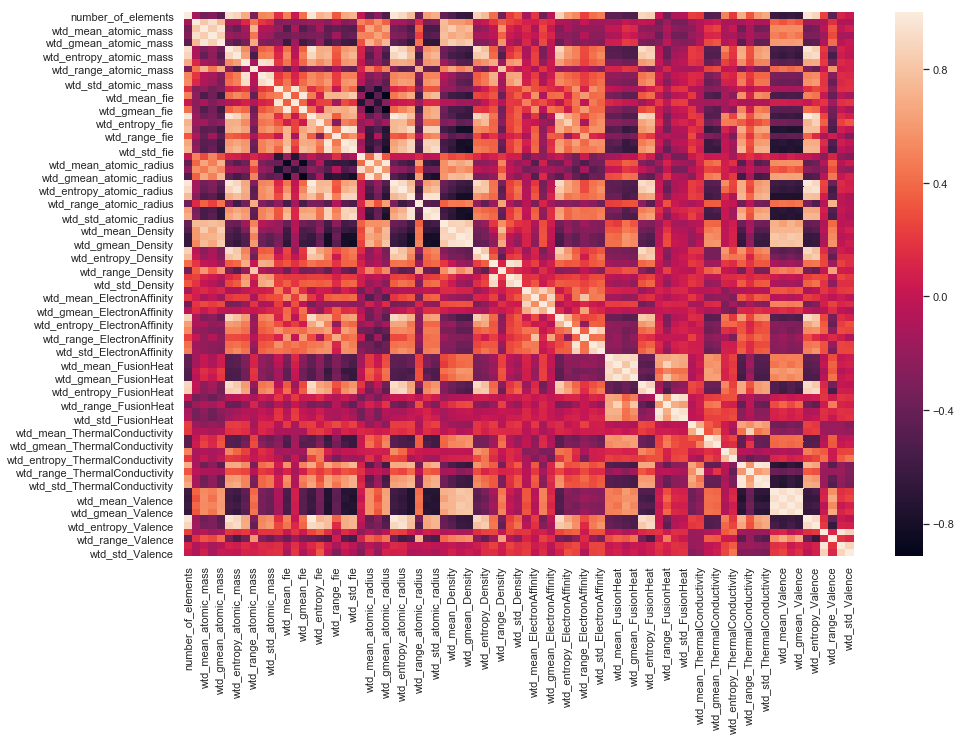

In [95]:
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(fs.corr_matrix)

##### Finding Zero Importance Features

In [96]:
fs.identify_zero_importance(task='regression',eval_metric='rmse',n_iterations=5,early_stopping=True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 9.38301	valid_0's l2: 88.0409
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 8.89715	valid_0's l2: 79.1593
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 9.68113	valid_0's l2: 93.7244
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 9.68775	valid_0's l2: 93.8525
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[996]	valid_0's rmse: 9.47357	valid_0's l2: 89.7485

0 features with zero importance after one-hot encoding.



##### Finding Low Importance Features
cumulative_importance = percent of cumulative importance to be gained after removing the low importance features.

In [97]:
fs.identify_low_importance(cumulative_importance=0.95)

67 features required for cumulative importance of 0.95 after one hot encoding.
14 features do not contribute to cumulative importance of 0.95.



##### Plotting feature importances with highest importances

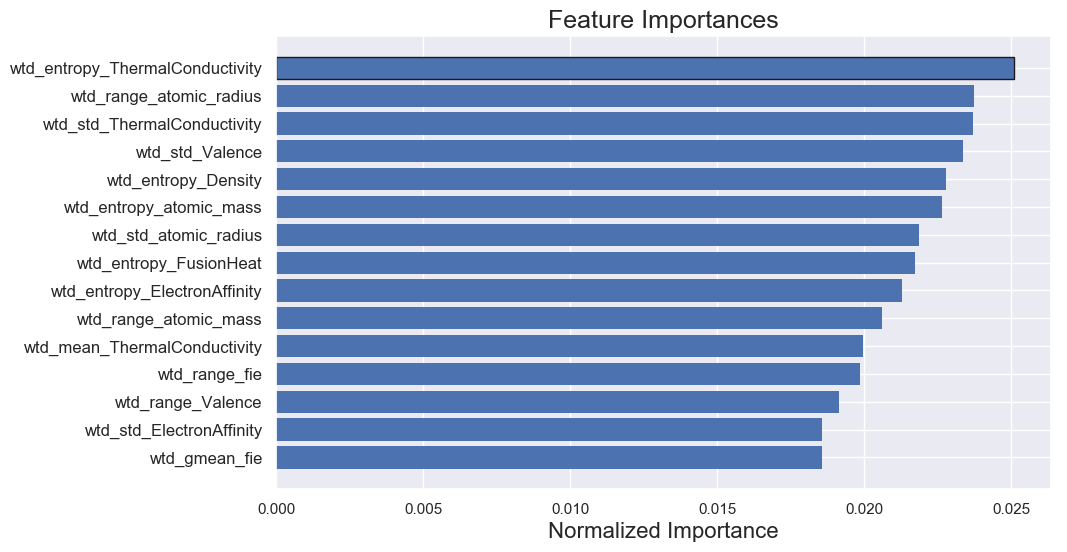

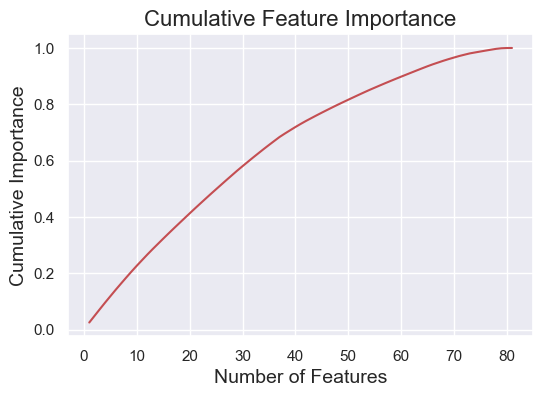

In [98]:
fs.plot_feature_importances()

In [99]:
feature_importances = pd.DataFrame(fs.feature_importances)
feature_importances.head(10)

,feature,importance,normalized_importance,cumulative_importance
0,wtd_entropy_ThermalConductivity,752.6,0.025107,0.025107
1,wtd_range_atomic_radius,711.8,0.023746,0.048852
2,wtd_std_ThermalConductivity,711.0,0.023719,0.072571
3,wtd_std_Valence,700.4,0.023365,0.095937
4,wtd_entropy_Density,682.6,0.022772,0.118708
5,wtd_entropy_atomic_mass,678.6,0.022638,0.141346
6,wtd_std_atomic_radius,656.0,0.021884,0.163231
7,wtd_entropy_FusionHeat,651.0,0.021717,0.184948
8,wtd_entropy_ElectronAffinity,638.4,0.021297,0.206245
9,wtd_range_atomic_mass,618.0,0.020616,0.226861


##### Removing Features using the methods used above
methods - 'all', 'missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'

In [100]:
train_removed = fs.remove(methods = ['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'])

Removed 34 features.


#### We can even run all at once using 'identify_all' function

# Analysis of feature selection 

In this analysis we have used the values for feature importance gained from the RFE technique and the number of features selected by RFE-CV technique. We then plot the model score vs the number of features selection in the descending order of the importances.

In [61]:
feature_list = []
scores_lr = []
Sorted_features = importance_df.sort_values(by='Linear Regression',ascending=False).index.values
for feature in Sorted_features:
    feature_list.append(feature)
    cls = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(X[feature_list], y, test_size=0.2, random_state=42)
    cls.fit(X_train,y_train)
    scores_lr.append(cls.score(X_test,y_test))

Text(79,0.713849,'Score = 0.7338491670201177')

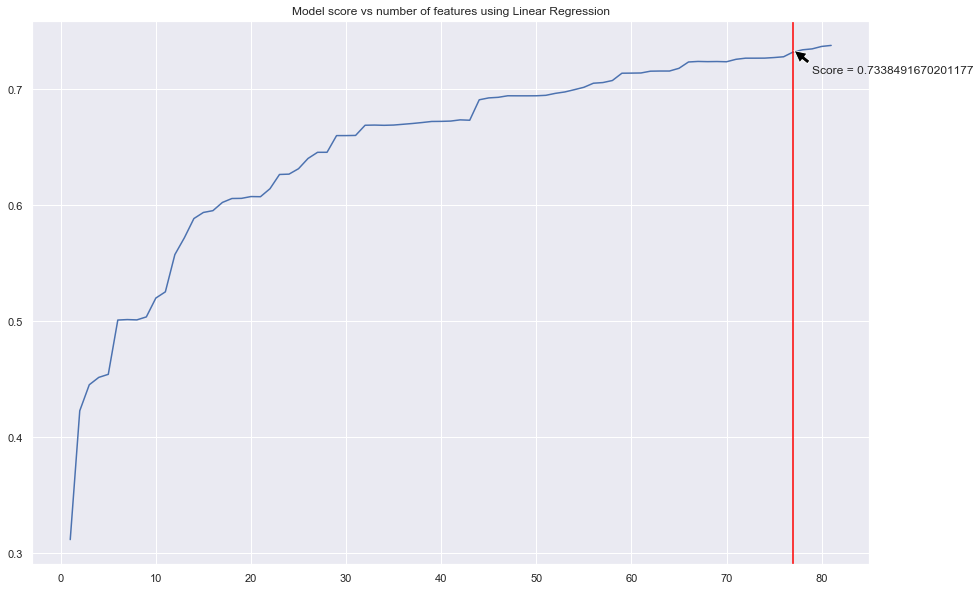

In [66]:
ax = sns.lineplot(x=list(range(1,len(scores_lr)+1)),y=scores_lr)
ax.set_title('Model score vs number of features using Linear Regression')
n = 77
plt.axvline(x=n,color = 'red')
ax.annotate('Score = '+str(scores_lr[n]), xy=(n,scores_lr[n] ), xytext=(n+2,scores_lr[n]-0.02),arrowprops=dict(facecolor='black', shrink=0.05),)

In [67]:
feature_list = []
scores_lasso = []
Sorted_features = importance_df.sort_values(by='Lasso Regression',ascending=False).index.values
for feature in Sorted_features:
    feature_list.append(feature)
    cls = LassoCV()
    X_train, X_test, y_train, y_test = train_test_split(X[feature_list], y, test_size=0.2, random_state=42)
    cls.fit(X_train,y_train)
    scores_lasso.append(cls.score(X_test,y_test))

Text(24,0.562374,'Score = 0.5693737304848829')

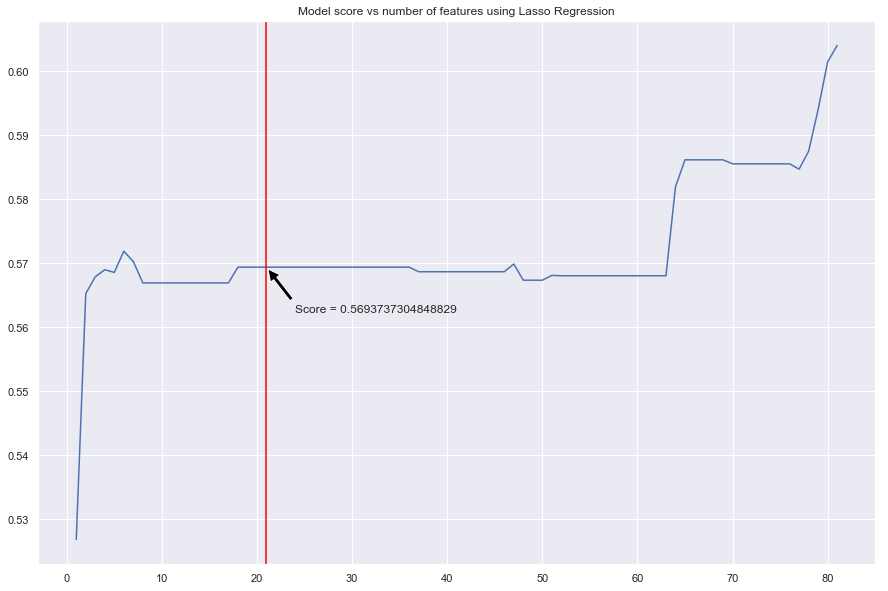

In [90]:
ax = sns.lineplot(x=list(range(1,len(scores_lasso)+1)),y=scores_lasso)
ax.set_title('Model score vs number of features using Lasso Regression')
n = 21
plt.axvline(x=n,color = 'red')
ax.annotate('Score = '+str(scores_lasso[n]), xy=(n,scores_lasso[n] ), xytext=(n+3,scores_lasso[n]-0.007),arrowprops=dict(facecolor='black', shrink=0.05),)

In [71]:
feature_list = []
scores_dtr = []
Sorted_features = importance_df.sort_values(by='Decision Tree Regression',ascending=False).index.values
for feature in Sorted_features:
    feature_list.append(feature)
    cls = DecisionTreeRegressor()
    X_train, X_test, y_train, y_test = train_test_split(X[feature_list], y, test_size=0.2, random_state=42)
    cls.fit(X_train,y_train)
    scores_dtr.append(cls.score(X_test,y_test))

Text(26,0.858939,'Score = 0.8789393471384911')

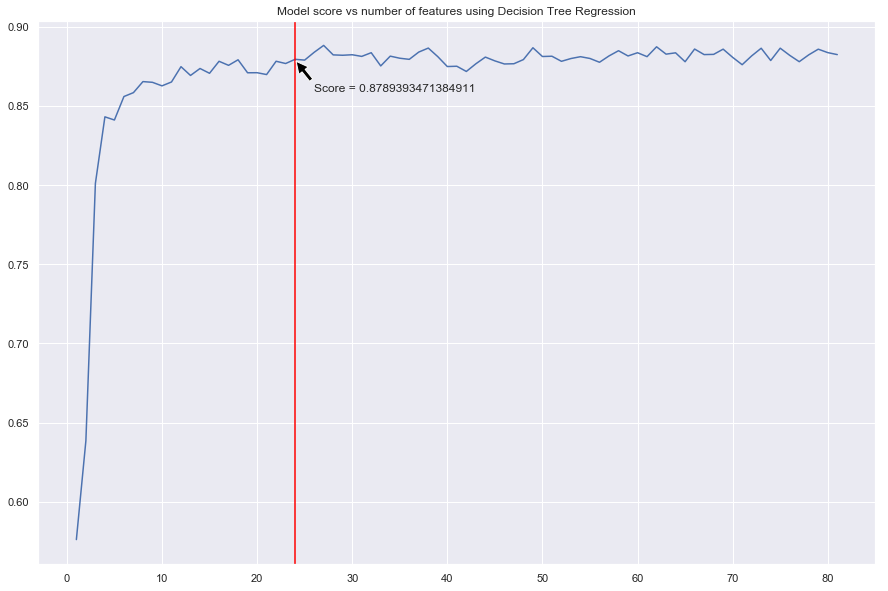

In [78]:
ax = sns.lineplot(x=list(range(1,len(scores_dtr)+1)),y=scores_dtr)
ax.set_title('Model score vs number of features using Decision Tree Regression')
n = 24
plt.axvline(x=n,color = 'red')
ax.annotate('Score = '+str(scores_dtr[n]), xy=(n,scores_dtr[n] ), xytext=(n+2,scores_dtr[n]-0.02),arrowprops=dict(facecolor='black', shrink=0.05),)

In [73]:
feature_list = []
scores_etr = []
Sorted_features = importance_df.sort_values(by='ExtraTreesRegressor',ascending=False).index.values
for feature in Sorted_features:
    feature_list.append(feature)
    cls = ExtraTreesRegressor()
    X_train, X_test, y_train, y_test = train_test_split(X[feature_list], y, test_size=0.2, random_state=42)
    cls.fit(X_train,y_train)
    scores_etr.append(cls.score(X_test,y_test))

Text(72,0.905881,'Score = 0.9258805968437813')

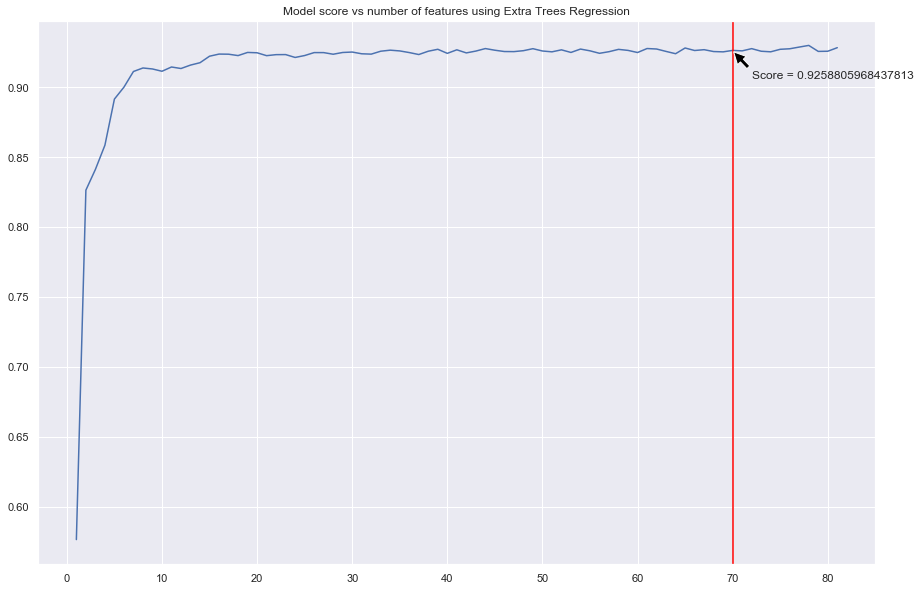

In [74]:
ax = sns.lineplot(x=list(range(1,len(scores_etr)+1)),y=scores_etr)
ax.set_title('Model score vs number of features using Extra Trees Regression')
n = 70
plt.axvline(x=n,color = 'red')
ax.annotate('Score = '+str(scores_etr[n]), xy=(n,scores_etr[n] ), xytext=(n+2,scores_etr[n]-0.02),arrowprops=dict(facecolor='black', shrink=0.05),)

In [76]:
feature_list = []
scores_xgb = []
Sorted_features = importance_df.sort_values(by='XGBRegressor',ascending=False).index.values
for feature in Sorted_features:
    feature_list.append(feature)
    cls = XGBRegressor(objective='reg:squarederror')
    X_train, X_test, y_train, y_test = train_test_split(X[feature_list], y, test_size=0.2, random_state=42)
    cls.fit(X_train,y_train)
    scores_xgb.append(cls.score(X_test,y_test))

Text(60,0.847636,'Score = 0.867635938951841')

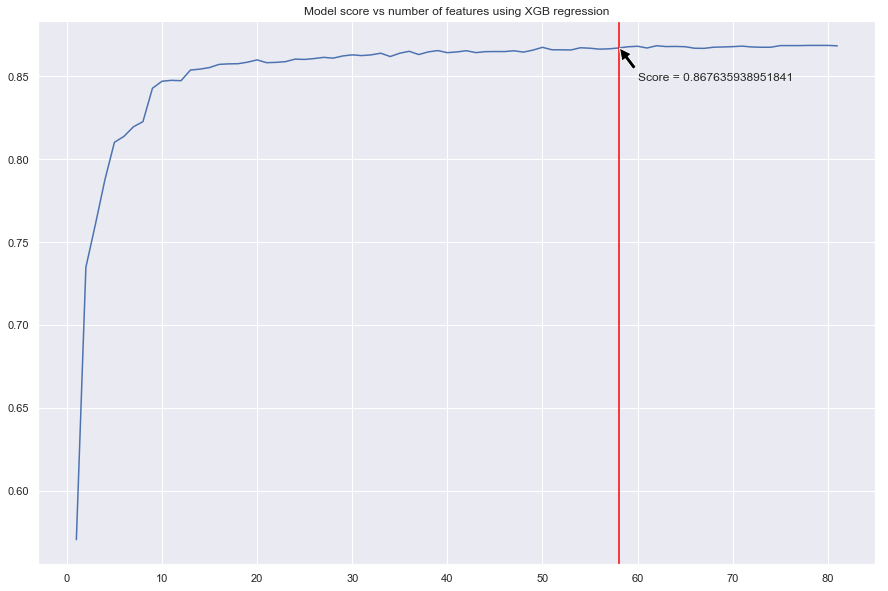

In [77]:
ax = sns.lineplot(x=list(range(1,len(scores_xgb)+1)),y=scores_xgb)
ax.set_title('Model score vs number of features using XGB regression')
n = 58
plt.axvline(x=n,color = 'red')
ax.annotate('Score = '+str(scores_xgb[n]), xy=(n,scores_xgb[n] ), xytext=(n+2,scores_xgb[n]-0.02),arrowprops=dict(facecolor='black', shrink=0.05),)